In [27]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('/Users/walu/lle_25/RE03/build')

In [28]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

def convert_to_csv(input_file, output_file):
    header = ["iX", "iY", "iZ", "dose", "total_val_squared", "entry"]
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(header)
        for line in infile:
            if line.startswith('#') or line.strip() == '':
                continue
            values = [v.strip() for v in line.strip().split(',')]
            writer.writerow(values)

def plot_phantom_dose_by_particle(phantom_index):
    base_path = f'phantom_output/phantom{phantom_index}'

    # Particle input files
    particle_types = {
        "Electron": "dDepElectron.txt",
        "Proton": "dDepProton.txt",
        "Neutron": "dDepNeutron.txt",
        "Gamma": "dDepGamma.txt",
        "Alpha": "dDepAlpha.txt",
        "Muon Plus": "dDepMuonPlus.txt",
        "Muon Minus": "dDepMuonMinus.txt"
    }

    # Corresponding Quality Factors (Q)
    quality_factors = {
        "Electron": 1,
        "Gamma": 1,
        "Alpha": 20,
        "Neutron": 10,
        "Proton": 10,
        "Muon Plus": 10,
        "Muon Minus": 10
    }

    # Colors for plot
    particle_colors = {
        "Electron": "#1f77b4",
        "Proton": "#ff7f0e",
        "Neutron": "#2ca02c",
        "Gamma": "#d62728",
        "Alpha": "#9467bd",
        "Muon Plus": "#8c564b",
        "Muon Minus": "#e377c2"
    }

    dose_equiv_rem = {}
    total_dose = 0
    for particle, filename in particle_types.items():
        txt_path = os.path.join(base_path, filename)
        csv_path = txt_path.replace('.txt', '.csv')
        convert_to_csv(txt_path, csv_path)
        df = pd.read_csv(csv_path)

        total_dose_gy = df['dose'].sum()
        q_factor = quality_factors[particle]
        total_dose_rem = total_dose_gy * 100 * q_factor * 1.56e8 * 1e6 * (1/2e5)
        total_dose += total_dose_rem

        dose_equiv_rem[particle] = total_dose_rem
        print(f"Total dose equivalent for {particle.lower()} in phantom{phantom_index}: {total_dose_rem:.2f} microrem per shot")

    # Plotting
    particles = list(dose_equiv_rem.keys())
    doses_rem = list(dose_equiv_rem.values())
    colors = [particle_colors[p] for p in particles]
    print(f"total dose for this phantom: {total_dose:.2f} microrem per shot")

    plt.figure(figsize=(10, 6))
    plt.barh(particles, doses_rem, color=colors)
    plt.xlabel("Dose Equivalent (micro rem per shot)")
    plt.title(f"Dose Equivalent by Particle Type for Phantom {phantom_index}")
    plt.xscale('log')
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


Total dose equivalent for electron in phantom1: 5.85 microrem per shot
Total dose equivalent for proton in phantom1: 0.70 microrem per shot
Total dose equivalent for neutron in phantom1: 0.18 microrem per shot
Total dose equivalent for gamma in phantom1: 0.00 microrem per shot
Total dose equivalent for alpha in phantom1: 0.00 microrem per shot
Total dose equivalent for muon plus in phantom1: 0.00 microrem per shot
Total dose equivalent for muon minus in phantom1: 0.00 microrem per shot
total dose for this phantom: 6.724027334219519


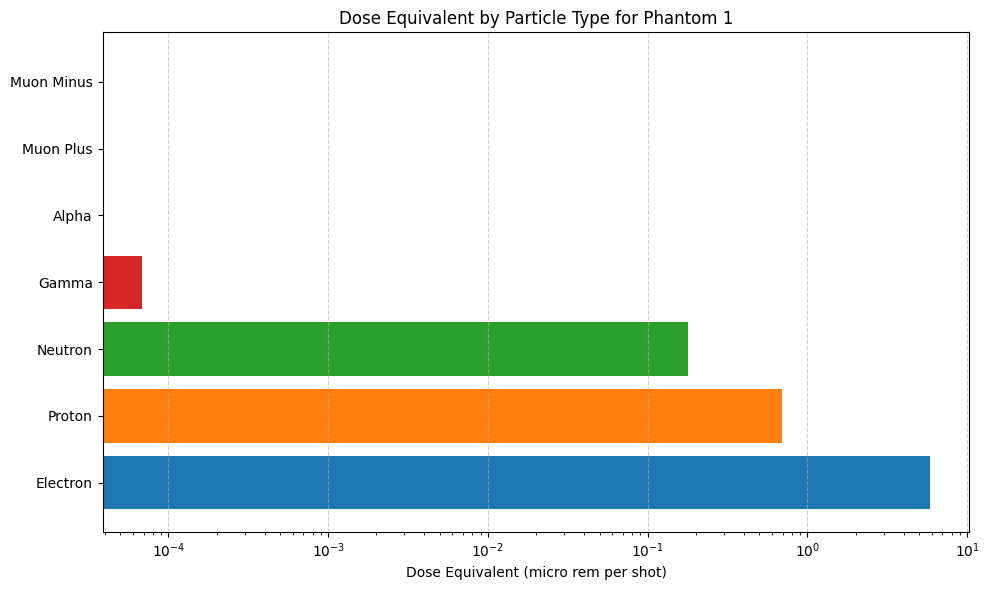

In [29]:
plot_phantom_dose_by_particle(1)


Total dose equivalent for electron in phantom2: 0.00 rem
Total dose equivalent for proton in phantom2: 0.00 rem
Total dose equivalent for neutron in phantom2: 0.00 rem
Total dose equivalent for gamma in phantom2: 0.00 rem
Total dose equivalent for alpha in phantom2: 0.00 rem
Total dose equivalent for muon plus in phantom2: 0.00 rem
Total dose equivalent for muon minus in phantom2: 0.00 rem


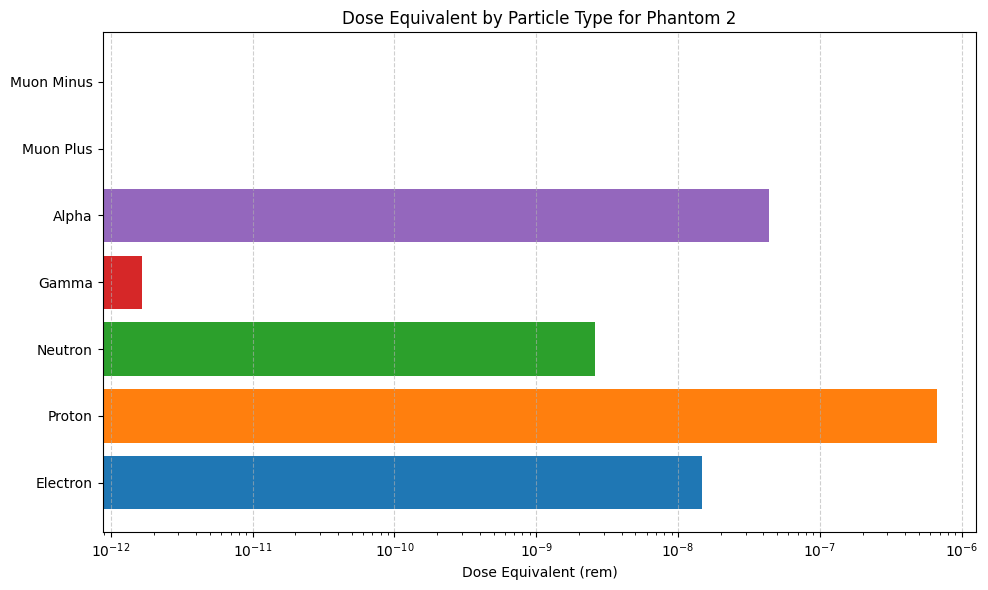

In [23]:
plot_phantom_dose_by_particle(2)


Total dose equivalent for electron in phantom3: 0.00 rem
Total dose equivalent for proton in phantom3: 0.00 rem
Total dose equivalent for neutron in phantom3: 0.00 rem
Total dose equivalent for gamma in phantom3: 0.00 rem
Total dose equivalent for alpha in phantom3: 0.00 rem
Total dose equivalent for muon plus in phantom3: 0.00 rem
Total dose equivalent for muon minus in phantom3: 0.00 rem


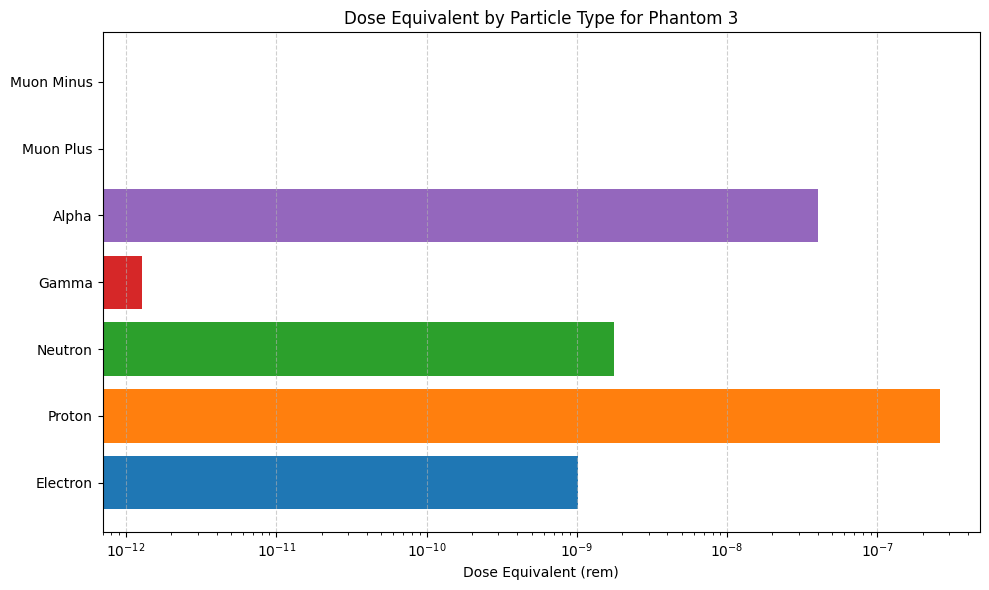

In [24]:
plot_phantom_dose_by_particle(3)


Total dose equivalent for electron in phantom4: 0.00 rem
Total dose equivalent for proton in phantom4: 0.00 rem
Total dose equivalent for neutron in phantom4: 0.00 rem
Total dose equivalent for gamma in phantom4: 0.00 rem
Total dose equivalent for alpha in phantom4: 0.00 rem
Total dose equivalent for muon plus in phantom4: 0.00 rem
Total dose equivalent for muon minus in phantom4: 0.00 rem


/var/folders/3k/qhhyzp650rsb_v_vhzr1qzm80000gn/T/ipykernel_92330/3962259222.py:77: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')


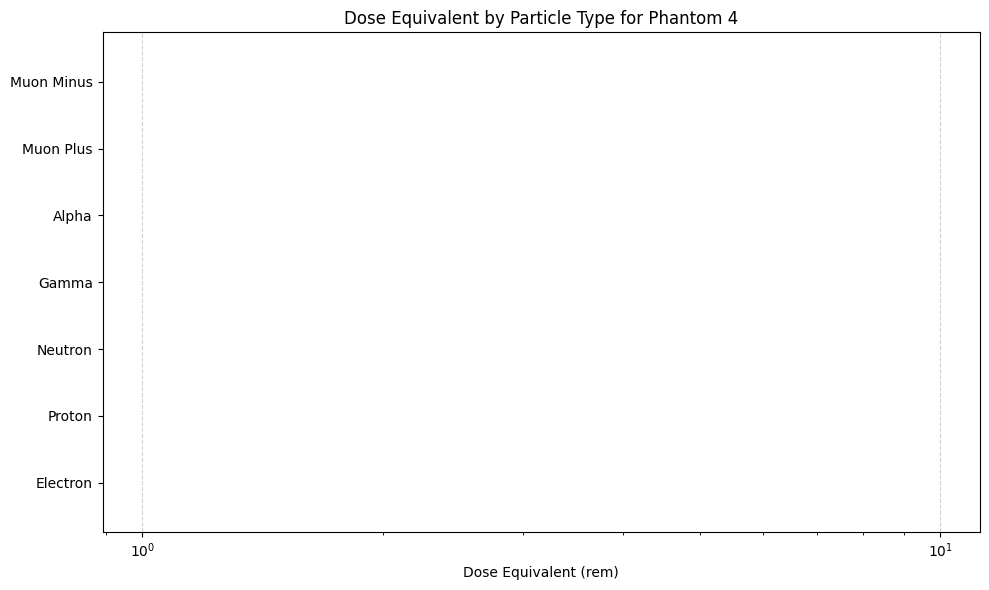

In [25]:
plot_phantom_dose_by_particle(4)


Total dose equivalent for electron in phantom5: 0.00 rem
Total dose equivalent for proton in phantom5: 0.00 rem
Total dose equivalent for neutron in phantom5: 0.00 rem
Total dose equivalent for gamma in phantom5: 0.00 rem
Total dose equivalent for alpha in phantom5: 0.00 rem
Total dose equivalent for muon plus in phantom5: 0.00 rem
Total dose equivalent for muon minus in phantom5: 0.00 rem


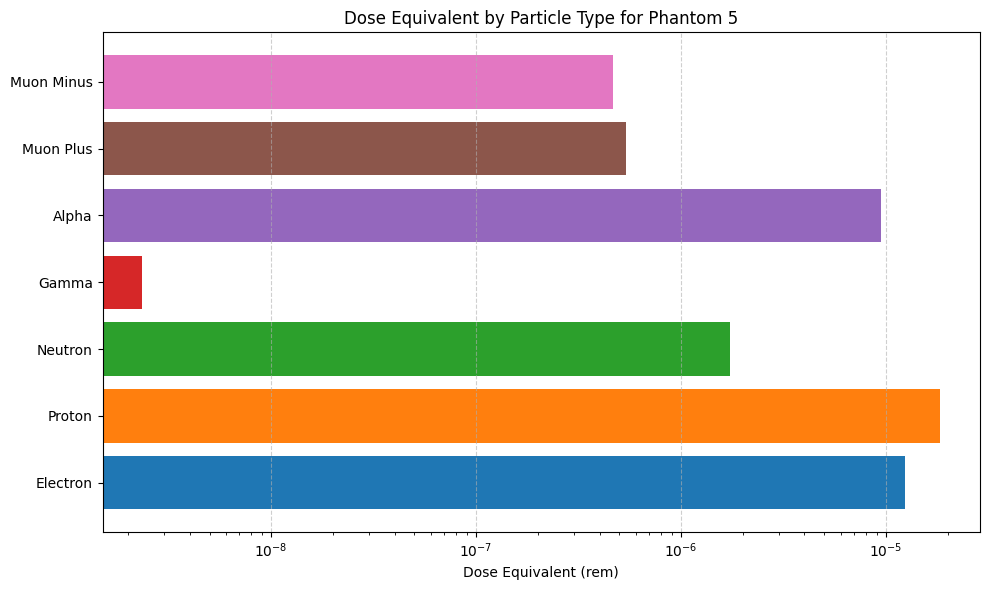

In [26]:
plot_phantom_dose_by_particle(5)
